In [1]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import gc
gc.collect()

0

In [3]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test_masked.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [4]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

In [8]:
# hack
end = 1000
start = 500
X_train = X_train[start:end+start]
y_train = y_train[start:end+start]
X_test = X_test[start:end+start]
y_test = y_test[start:end+start]

# POS-tagger

In [12]:
# https://www.nltk.org/api/nltk.tag.html
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')

#only works for english
def pos_tag_stringlist(strlist, shouldTokenize):
    pos_tagged_strlist = []
    if shouldTokenize: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(word_tokenize(str)))
    else: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(str))
    return pos_tagged_strlist

NameError: name 'nltk' is not defined

# Grid search

In [13]:
def grid_search(train_list, test_list, y_train, y_test):
    simp_contr = [0, 1]
    gram_cor = [0, 1]
    simp_neg = [0, 1]
    lemma = [0, 1]
    rem_stop = [0, 1]
    basic_preprocessing = 1
    list_of_data = []
    for z in simp_contr:
        for x in gram_cor:
            for c in simp_neg:
                for v in lemma:
                    for b in rem_stop:
                        train = train_list
                        test = test_list
                        if z == 1: # contractions
                            train = f.simplify_contraction(train)
                            test = f.simplify_contraction(test)
                        if basic_preprocessing == 1: # basic preprocessing
                            train = pp.basic_preprocess(train)
                            test = pp.basic_preprocess(test)
                        if x == 1: # grammar correction 
                            train = pp.grammar_corrector(train)
                            test = pp.grammar_corrector(test)
                        if c == 1: # Simnplyfy Negotiation 
                            train = f.simplify_negation(train)
                            test = f.simplify_negation(test)
                        if v == 1: # Lemmatize 
                            train = pp.lemmatize_sentencelist(train)
                            test = pp.lemmatize_sentencelist(test)
                        if b == 1: # Remove stop words
                            train = pp.remove_stop_words(train)
                            test = pp.remove_stop_words(test)

                        list_of_data.append([[z, basic_preprocessing, x, c, v, b], train, test]) #
    return list_of_data, y_train, y_test

# Below line is running for a while

In [14]:
data_sets, y_train, y_test = grid_search(X_train, X_test, y_train, y_test)

## Training Final

Combinations:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 3s 57ms/step - loss: 1.7440 - accuracy: 0.3610 - val_loss: 0.9704 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.8496 - accuracy: 0.4000
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 32ms/step - loss: 0.8496 - accuracy: 0.4000 - val_loss: 0.6882 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.6141 - accuracy: 0.6442
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 31ms/step - loss: 0.6104 - accuracy: 0.6570 - val_loss: 0.6543 - val_accuracy: 0.5900 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.8280
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

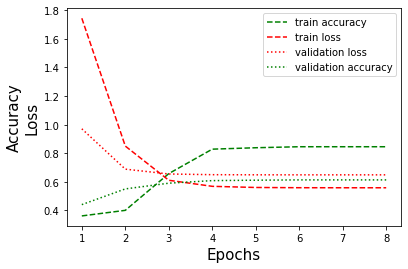

Combinations:  [0, 1, 0, 0, 0, 1]
Epoch 1/10
20/20 [==============================] - 3s 55ms/step - loss: 1.4342 - accuracy: 0.4180 - val_loss: 0.6902 - val_accuracy: 0.5690 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5840 - accuracy: 0.7011
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 33ms/step - loss: 0.5779 - accuracy: 0.7100 - val_loss: 0.6455 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.8470
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 33ms/step - loss: 0.4960 - accuracy: 0.8470 - val_loss: 0.6429 - val_accuracy: 0.6190 - lr: 2.0000e-04
Epoch 4/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4749 - accuracy: 0.8367
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

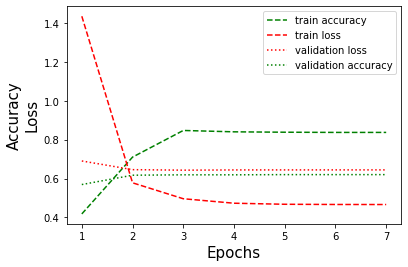

Combinations:  [0, 1, 0, 0, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 1.3215 - accuracy: 0.3770 - val_loss: 0.6740 - val_accuracy: 0.5620 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5620 - accuracy: 0.6853
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 30ms/step - loss: 0.5659 - accuracy: 0.6810 - val_loss: 0.6542 - val_accuracy: 0.5940 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4817 - accuracy: 0.7911
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 33ms/step - loss: 0.4771 - accuracy: 0.7940 - val_loss: 0.6385 - val_accuracy: 0.6070 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4609 - accuracy: 0.8074
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

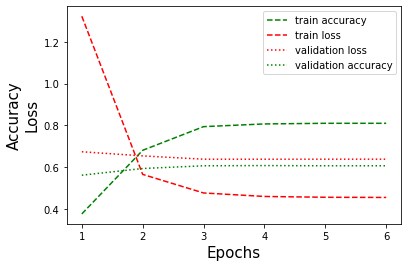

Combinations:  [0, 1, 0, 0, 1, 1]
Epoch 1/10
20/20 [==============================] - 3s 61ms/step - loss: 1.5714 - accuracy: 0.3800 - val_loss: 0.7076 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5893 - accuracy: 0.6821
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 33ms/step - loss: 0.5887 - accuracy: 0.6840 - val_loss: 0.6854 - val_accuracy: 0.5880 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4928 - accuracy: 0.7905
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 33ms/step - loss: 0.4903 - accuracy: 0.7930 - val_loss: 0.6577 - val_accuracy: 0.6040 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4720 - accuracy: 0.8137
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

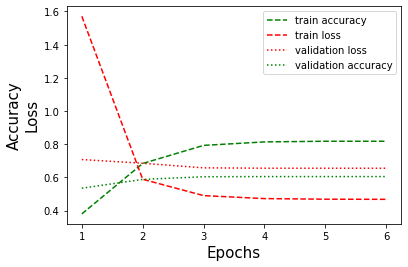

Combinations:  [0, 1, 0, 1, 0, 0]
Epoch 1/10
20/20 [==============================] - 2s 54ms/step - loss: 1.8501 - accuracy: 0.3610 - val_loss: 1.0214 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.8991 - accuracy: 0.3910
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 32ms/step - loss: 0.8991 - accuracy: 0.3910 - val_loss: 0.7265 - val_accuracy: 0.5390 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.6655 - accuracy: 0.5111
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 33ms/step - loss: 0.6600 - accuracy: 0.5220 - val_loss: 0.6808 - val_accuracy: 0.5680 - lr: 2.0000e-04
Epoch 4/10
18/20 [==========================>...] - ETA: 0s - loss: 0.6116 - accuracy: 0.6056
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

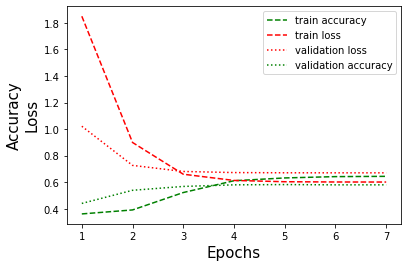

Combinations:  [0, 1, 0, 1, 0, 1]
Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 1.4018 - accuracy: 0.4710 - val_loss: 0.7517 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5771 - accuracy: 0.7189
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 32ms/step - loss: 0.5762 - accuracy: 0.7270 - val_loss: 0.6291 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4922 - accuracy: 0.8670
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 32ms/step - loss: 0.4922 - accuracy: 0.8670 - val_loss: 0.6291 - val_accuracy: 0.6390 - lr: 2.0000e-04
Epoch 4/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4609 - accuracy: 0.8522
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

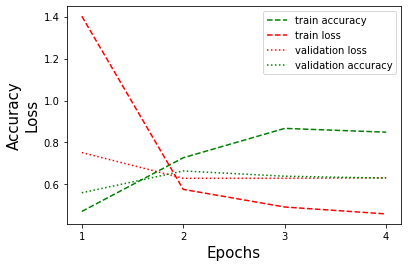

Combinations:  [0, 1, 0, 1, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 58ms/step - loss: 1.5996 - accuracy: 0.3650 - val_loss: 0.7212 - val_accuracy: 0.5290 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.6058 - accuracy: 0.6333
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 33ms/step - loss: 0.5980 - accuracy: 0.6400 - val_loss: 0.6818 - val_accuracy: 0.5810 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4990 - accuracy: 0.7278
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 34ms/step - loss: 0.4937 - accuracy: 0.7340 - val_loss: 0.6489 - val_accuracy: 0.6040 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4760 - accuracy: 0.7740
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

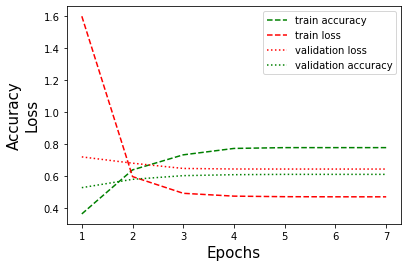

Combinations:  [0, 1, 0, 1, 1, 1]
Epoch 1/10
20/20 [==============================] - 3s 57ms/step - loss: 1.4290 - accuracy: 0.4360 - val_loss: 0.6784 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5753 - accuracy: 0.6967
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 31ms/step - loss: 0.5709 - accuracy: 0.7050 - val_loss: 0.6294 - val_accuracy: 0.6570 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4851 - accuracy: 0.8474
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 46ms/step - loss: 0.4830 - accuracy: 0.8490 - val_loss: 0.6274 - val_accuracy: 0.6590 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4624 - accuracy: 0.8400
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

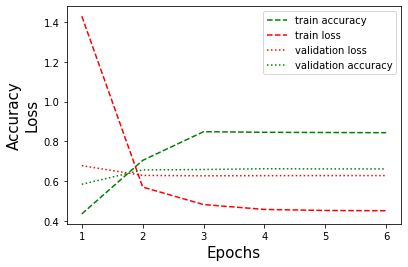

Combinations:  [0, 1, 1, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 4s 55ms/step - loss: 1.2883 - accuracy: 0.3990 - val_loss: 0.6709 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.6770
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 31ms/step - loss: 0.5887 - accuracy: 0.6770 - val_loss: 0.6620 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5150 - accuracy: 0.7379
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 33ms/step - loss: 0.5138 - accuracy: 0.7400 - val_loss: 0.6472 - val_accuracy: 0.5970 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.7600
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

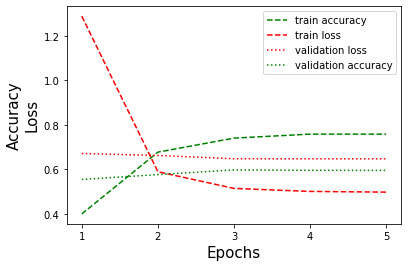

Combinations:  [0, 1, 1, 0, 0, 1]
Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 1.7935 - accuracy: 0.3710 - val_loss: 0.7614 - val_accuracy: 0.5360 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.6235 - accuracy: 0.6522
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 31ms/step - loss: 0.6143 - accuracy: 0.6560 - val_loss: 0.7161 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5184 - accuracy: 0.7389
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 31ms/step - loss: 0.5161 - accuracy: 0.7440 - val_loss: 0.6734 - val_accuracy: 0.6090 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4924 - accuracy: 0.7916
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

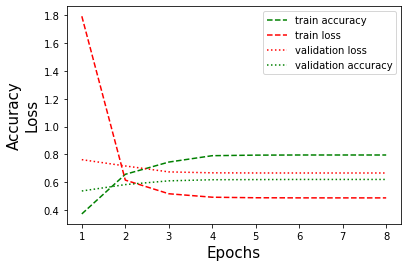

Combinations:  [0, 1, 1, 0, 1, 0]
Epoch 1/10
20/20 [==============================] - 4s 83ms/step - loss: 1.9965 - accuracy: 0.3610 - val_loss: 1.0041 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.8871 - accuracy: 0.3726
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 35ms/step - loss: 0.8802 - accuracy: 0.3740 - val_loss: 0.7026 - val_accuracy: 0.5380 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.6423 - accuracy: 0.5632
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 30ms/step - loss: 0.6392 - accuracy: 0.5700 - val_loss: 0.6629 - val_accuracy: 0.5880 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5947 - accuracy: 0.7337
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

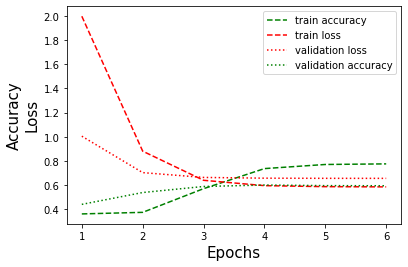

Combinations:  [0, 1, 1, 0, 1, 1]
Epoch 1/10
20/20 [==============================] - 4s 98ms/step - loss: 1.6934 - accuracy: 0.4490 - val_loss: 0.7071 - val_accuracy: 0.5790 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5883 - accuracy: 0.7000
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 29ms/step - loss: 0.5858 - accuracy: 0.7040 - val_loss: 0.6346 - val_accuracy: 0.6440 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.8590
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 32ms/step - loss: 0.4916 - accuracy: 0.8590 - val_loss: 0.6319 - val_accuracy: 0.6550 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.8547
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

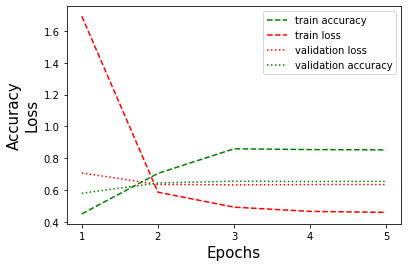

Combinations:  [0, 1, 1, 1, 0, 0]
Epoch 1/10
20/20 [==============================] - 4s 102ms/step - loss: 1.4623 - accuracy: 0.4050 - val_loss: 0.6635 - val_accuracy: 0.5810 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.6810
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 36ms/step - loss: 0.5824 - accuracy: 0.6810 - val_loss: 0.6419 - val_accuracy: 0.6340 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5041 - accuracy: 0.8453
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 31ms/step - loss: 0.5019 - accuracy: 0.8470 - val_loss: 0.6392 - val_accuracy: 0.6290 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.8290
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [==

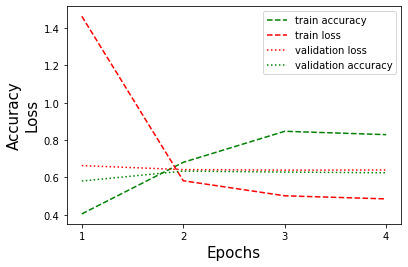

Combinations:  [0, 1, 1, 1, 0, 1]
Epoch 1/10
20/20 [==============================] - 4s 64ms/step - loss: 1.3940 - accuracy: 0.3920 - val_loss: 0.6783 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5729 - accuracy: 0.7063
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 30ms/step - loss: 0.5664 - accuracy: 0.7110 - val_loss: 0.6578 - val_accuracy: 0.6340 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4706 - accuracy: 0.8284
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 32ms/step - loss: 0.4706 - accuracy: 0.8280 - val_loss: 0.6417 - val_accuracy: 0.6380 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4502 - accuracy: 0.8432
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

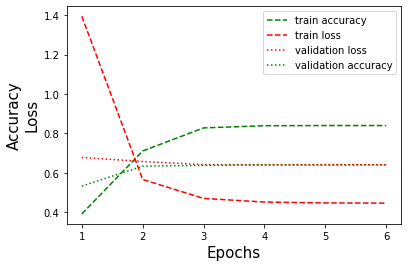

Combinations:  [0, 1, 1, 1, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 65ms/step - loss: 1.2491 - accuracy: 0.4420 - val_loss: 0.6839 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5796 - accuracy: 0.6722
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 33ms/step - loss: 0.5776 - accuracy: 0.6750 - val_loss: 0.6382 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5010 - accuracy: 0.8380
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 32ms/step - loss: 0.5010 - accuracy: 0.8380 - val_loss: 0.6381 - val_accuracy: 0.6160 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.8210
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

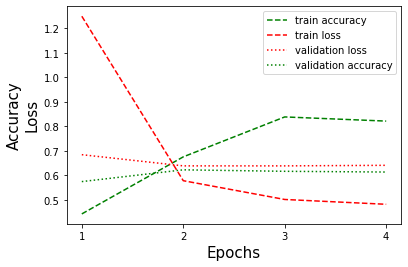

Combinations:  [0, 1, 1, 1, 1, 1]
Epoch 1/10
20/20 [==============================] - 3s 63ms/step - loss: 1.6941 - accuracy: 0.3610 - val_loss: 0.8180 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.6443 - accuracy: 0.6042
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 36ms/step - loss: 0.6351 - accuracy: 0.6140 - val_loss: 0.6679 - val_accuracy: 0.6180 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4811 - accuracy: 0.7760
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 36ms/step - loss: 0.4811 - accuracy: 0.7760 - val_loss: 0.6640 - val_accuracy: 0.6220 - lr: 2.0000e-04
Epoch 4/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4637 - accuracy: 0.7922
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

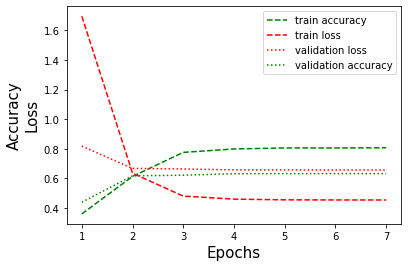

Combinations:  [1, 1, 0, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 3s 64ms/step - loss: 1.8238 - accuracy: 0.3610 - val_loss: 0.8788 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.7116 - accuracy: 0.5360
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 35ms/step - loss: 0.7116 - accuracy: 0.5360 - val_loss: 0.6586 - val_accuracy: 0.5980 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.7467
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 35ms/step - loss: 0.5255 - accuracy: 0.7470 - val_loss: 0.6653 - val_accuracy: 0.5950 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.7526
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

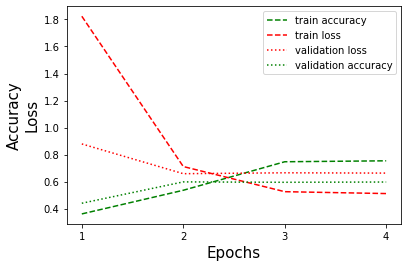

Combinations:  [1, 1, 0, 0, 0, 1]
Epoch 1/10
20/20 [==============================] - 3s 64ms/step - loss: 1.2590 - accuracy: 0.4240 - val_loss: 0.6892 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.7150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 36ms/step - loss: 0.5773 - accuracy: 0.7150 - val_loss: 0.6405 - val_accuracy: 0.6470 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4917 - accuracy: 0.8470
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 40ms/step - loss: 0.4917 - accuracy: 0.8470 - val_loss: 0.6390 - val_accuracy: 0.6400 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.8460
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

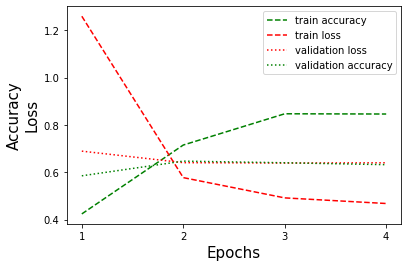

Combinations:  [1, 1, 0, 0, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 62ms/step - loss: 1.7506 - accuracy: 0.3610 - val_loss: 0.8682 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.7369 - accuracy: 0.4916
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 36ms/step - loss: 0.7286 - accuracy: 0.5050 - val_loss: 0.6458 - val_accuracy: 0.6270 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5433 - accuracy: 0.8032
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 37ms/step - loss: 0.5447 - accuracy: 0.7980 - val_loss: 0.6446 - val_accuracy: 0.6010 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5238 - accuracy: 0.7853
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

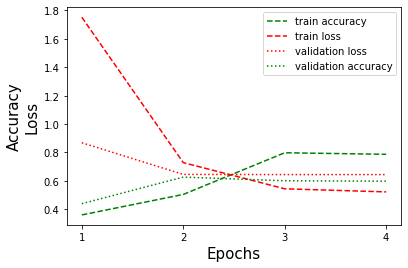

Combinations:  [1, 1, 0, 0, 1, 1]
Epoch 1/10
20/20 [==============================] - 4s 64ms/step - loss: 1.4426 - accuracy: 0.3830 - val_loss: 0.6904 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5735 - accuracy: 0.6979
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 41ms/step - loss: 0.5686 - accuracy: 0.7020 - val_loss: 0.6579 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8189
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 37ms/step - loss: 0.4598 - accuracy: 0.8200 - val_loss: 0.6387 - val_accuracy: 0.6320 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4399 - accuracy: 0.8400
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

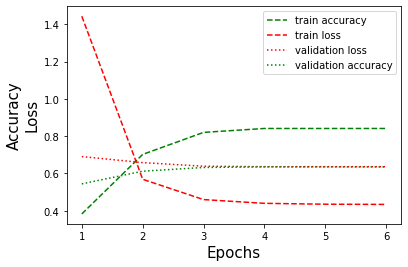

Combinations:  [1, 1, 0, 1, 0, 0]
Epoch 1/10
20/20 [==============================] - 3s 73ms/step - loss: 1.2532 - accuracy: 0.4450 - val_loss: 0.7709 - val_accuracy: 0.5620 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5613 - accuracy: 0.7211
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 44ms/step - loss: 0.5570 - accuracy: 0.7280 - val_loss: 0.6277 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4756 - accuracy: 0.8850
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 49ms/step - loss: 0.4756 - accuracy: 0.8850 - val_loss: 0.6250 - val_accuracy: 0.6630 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4377 - accuracy: 0.8695
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

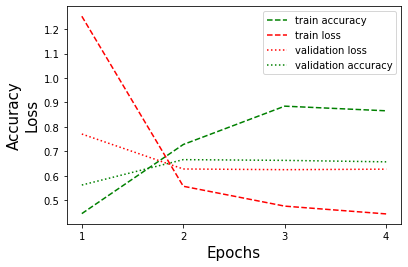

Combinations:  [1, 1, 0, 1, 0, 1]
Epoch 1/10
20/20 [==============================] - 4s 67ms/step - loss: 1.3815 - accuracy: 0.4630 - val_loss: 0.7502 - val_accuracy: 0.5730 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5700 - accuracy: 0.7158
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 39ms/step - loss: 0.5693 - accuracy: 0.7200 - val_loss: 0.6381 - val_accuracy: 0.6330 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4809 - accuracy: 0.8674
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 39ms/step - loss: 0.4788 - accuracy: 0.8690 - val_loss: 0.6361 - val_accuracy: 0.6470 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4498 - accuracy: 0.8610
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

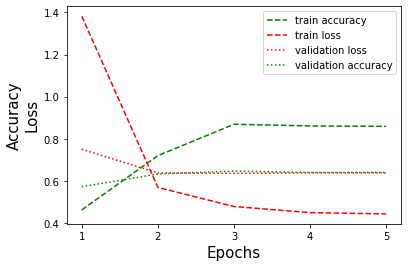

Combinations:  [1, 1, 0, 1, 1, 0]
Epoch 1/10
20/20 [==============================] - 4s 72ms/step - loss: 1.3579 - accuracy: 0.3780 - val_loss: 0.7067 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5843 - accuracy: 0.6621
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 47ms/step - loss: 0.5820 - accuracy: 0.6660 - val_loss: 0.6796 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4876 - accuracy: 0.7540
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 48ms/step - loss: 0.4876 - accuracy: 0.7540 - val_loss: 0.6420 - val_accuracy: 0.6160 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4744 - accuracy: 0.7926
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

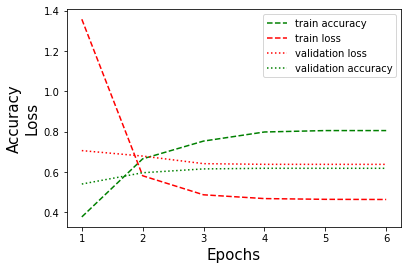

Combinations:  [1, 1, 0, 1, 1, 1]
Epoch 1/10
20/20 [==============================] - 5s 60ms/step - loss: 1.8959 - accuracy: 0.3750 - val_loss: 0.6821 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5818 - accuracy: 0.6905
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 34ms/step - loss: 0.5856 - accuracy: 0.6880 - val_loss: 0.6585 - val_accuracy: 0.5940 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4796 - accuracy: 0.8180
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 34ms/step - loss: 0.4796 - accuracy: 0.8180 - val_loss: 0.6364 - val_accuracy: 0.6300 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.8337
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

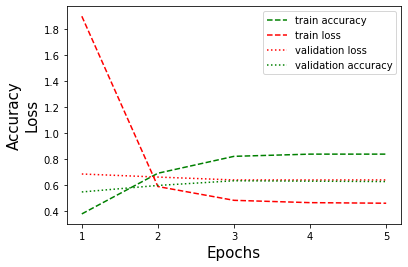

Combinations:  [1, 1, 1, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 3s 64ms/step - loss: 1.5986 - accuracy: 0.3680 - val_loss: 0.7420 - val_accuracy: 0.5320 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6123 - accuracy: 0.6390
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 35ms/step - loss: 0.6123 - accuracy: 0.6390 - val_loss: 0.6983 - val_accuracy: 0.5660 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.7020
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 34ms/step - loss: 0.5168 - accuracy: 0.7020 - val_loss: 0.6582 - val_accuracy: 0.5800 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4982 - accuracy: 0.7326
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

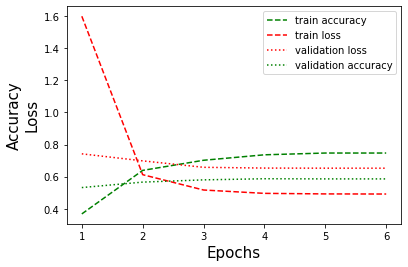

Combinations:  [1, 1, 1, 0, 0, 1]
Epoch 1/10
20/20 [==============================] - 3s 57ms/step - loss: 1.4704 - accuracy: 0.3700 - val_loss: 0.7401 - val_accuracy: 0.5360 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.5895 - accuracy: 0.6810
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 33ms/step - loss: 0.5895 - accuracy: 0.6810 - val_loss: 0.7293 - val_accuracy: 0.5830 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.5096 - accuracy: 0.7489
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 32ms/step - loss: 0.5034 - accuracy: 0.7530 - val_loss: 0.6758 - val_accuracy: 0.6030 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4775 - accuracy: 0.7960
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

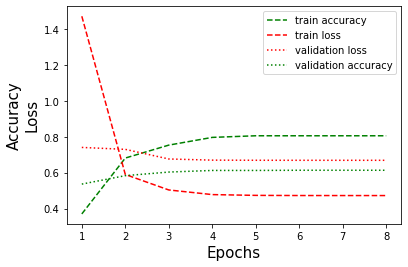

Combinations:  [1, 1, 1, 0, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 1.4737 - accuracy: 0.3910 - val_loss: 0.6813 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5937 - accuracy: 0.6579
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 34ms/step - loss: 0.5866 - accuracy: 0.6620 - val_loss: 0.6659 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5010 - accuracy: 0.7560
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 40ms/step - loss: 0.5010 - accuracy: 0.7560 - val_loss: 0.6483 - val_accuracy: 0.5940 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4835 - accuracy: 0.7926
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

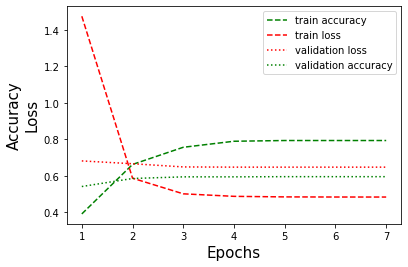

Combinations:  [1, 1, 1, 0, 1, 1]
Epoch 1/10
20/20 [==============================] - 3s 58ms/step - loss: 1.6762 - accuracy: 0.3610 - val_loss: 0.8503 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.6973 - accuracy: 0.5326
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 31ms/step - loss: 0.6941 - accuracy: 0.5390 - val_loss: 0.6447 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4961 - accuracy: 0.8211
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 30ms/step - loss: 0.4951 - accuracy: 0.8200 - val_loss: 0.6501 - val_accuracy: 0.6190 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4749 - accuracy: 0.8211
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

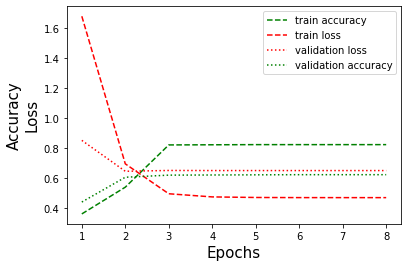

Combinations:  [1, 1, 1, 1, 0, 0]
Epoch 1/10
20/20 [==============================] - 3s 61ms/step - loss: 1.6051 - accuracy: 0.4050 - val_loss: 0.6636 - val_accuracy: 0.5690 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5720 - accuracy: 0.6821
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 35ms/step - loss: 0.5716 - accuracy: 0.6850 - val_loss: 0.6431 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 3/10
18/20 [==========================>...] - ETA: 0s - loss: 0.4967 - accuracy: 0.8411
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 35ms/step - loss: 0.4928 - accuracy: 0.8420 - val_loss: 0.6371 - val_accuracy: 0.6220 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4750 - accuracy: 0.8410
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

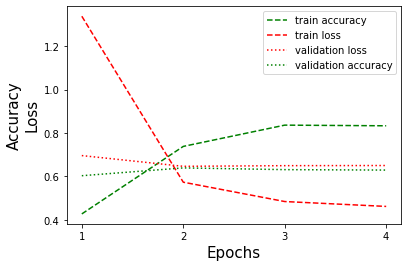

Combinations:  [1, 1, 1, 1, 1, 0]
Epoch 1/10
20/20 [==============================] - 3s 63ms/step - loss: 1.8826 - accuracy: 0.4100 - val_loss: 0.6643 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5989 - accuracy: 0.6621
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 37ms/step - loss: 0.5965 - accuracy: 0.6640 - val_loss: 0.6411 - val_accuracy: 0.6090 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.8020
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 37ms/step - loss: 0.5211 - accuracy: 0.8020 - val_loss: 0.6375 - val_accuracy: 0.6190 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5053 - accuracy: 0.8063
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

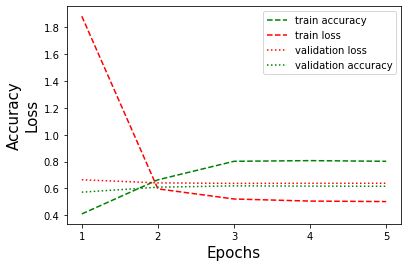

Combinations:  [1, 1, 1, 1, 1, 1]
Epoch 1/10
20/20 [==============================] - 3s 62ms/step - loss: 1.4688 - accuracy: 0.4350 - val_loss: 0.7195 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5849 - accuracy: 0.7084
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 1s 37ms/step - loss: 0.5841 - accuracy: 0.7130 - val_loss: 0.6427 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.5036 - accuracy: 0.8495
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 1s 37ms/step - loss: 0.5008 - accuracy: 0.8520 - val_loss: 0.6417 - val_accuracy: 0.6410 - lr: 2.0000e-04
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.4756 - accuracy: 0.8474
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [===

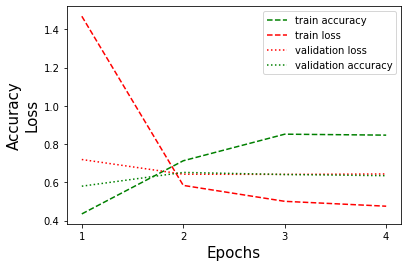

Combinations were checked


In [64]:
### INIT RESULTS
results, time = f.init_log_for_training()
# Sentencies max length:

max_len = 50
early_stop_patience = 2 # its 2 FOR NORMAL CASE

for data_set in data_sets:
    # Tokenizer
    labels = data_set[0]
    # check whenever combination is already checked. Working only with RNN!:
    print("Combinations: ", labels)

    tokenizer = pp.tokenizer_init(data_set[1], data_set[2])
    Train = tokenizer.texts_to_sequences(data_set[1])
    Test = tokenizer.texts_to_sequences(data_set[2])
        # Sequencer 
    X_train_p = pp.sequence_pad(Train, maxlen=max_len) # there are several attributes which can be defined, basic = first 50 words 
    X_test_p = pp.sequence_pad(Test,maxlen=max_len)
        
        # TRAIN
    #print("shapes: ", X_train_p.shape, X_test_p.shape)
    history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer, 
                                  maxlen=max_len, early_stop_patience=early_stop_patience)
    ### LOGGING INIT - RNN
    # GET the index of the highest test ACCURACY where the RNN model stopped to TRAIN
    max_value = max(history.history['val_accuracy'])
    max_index = history.history['val_accuracy'].index(max_value)
    # How many percent of the sentencies were catched full
    ratio_train, ratio_test = f.lengths_catch(data_set[1], data_set[2], length_of_sentence=max_len)
    
    new_row = {'Running ID':time, 
           "Model Name":"RNN", 
          "Expand Contractions":labels[0],
          "Basic Preprocessing":labels[1],
          "Grammar Correction":labels[2],
           "Simplify Negotiations": labels[3],
          "Lemmatize": labels[4],
          "Remove Stop Words": labels[5],
          "No. of Sentences": len(data_set[1]),
          "Train Accuracy STOP": history.history['accuracy'][max_index],
          "Test Accuracy STOP": history.history['val_accuracy'][max_index],
          "Train Loss STOP": history.history['loss'][max_index],
          "Test Loss STOP": history.history['val_loss'][max_index],
              "Train_sentence_fully_catched_ratio": ratio_train,
               "Test_sentence_fully_catched_ratio": ratio_test,
               "Length of Sentence":max_len}
    
    results = results.append(new_row, ignore_index=True)
    # maybe we dont need it in every round but how knows
    try:
        results.to_csv("results/results_"+time+".csv")
    except: 
        continue
    f.plot_model_history(history)    
    # CLEAN
    del labels
    del tokenizer
    del Train
    del Test
    del X_train_p
    del X_test_p
    del history
    del model 
    
# save results again
print("Combinations were checked")
results.to_csv("results/results_"+time+".csv") 

# Leave it in here for experimenting purpose: 

In [248]:
'''### INIT RESULTS
results, time = f.init_log_for_training()
for c in range(2):
    # Tokenizer
    labels = data_sets[c][0]
    print("##### Combination\n: ", data_sets[c][0])
    tokenizer = pp.tokenizer_init(data_sets[c][1], data_sets[c][2])
    Train = tokenizer.texts_to_sequences(data_sets[c][1])
    Test = tokenizer.texts_to_sequences(data_sets[c][2])
        # Sequencer 
    X_train_p = pp.sequence_pad(Train) # there are several attributes which can be defined, basic = first 50 words 
    X_test_p = pp.sequence_pad(Test)
        
    # TRAIN RNN
    history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer)

    ### LOGGING INIT - RNN
    # GET the index of the highest test ACCURACY where the RNN model stopped to TRAIN
    max_value = max(history.history['val_accuracy'])
    max_index = history.history['val_accuracy'].index(max_value)
    # append
    
    new_row = {'Running ID':save_time, 
           "Model Name":"RNN", 
          "Expand Contractions":labels[0],
          "Basic Preprocessing":labels[1],
          "Grammar Correction":labels[2],
           "Simplify Negotiations": labels[3],
          "Lemmatize": labels[4],
          "Remove Stop Words": labels[5],
          "No. of Sentences": len(data_sets[c][1]),
          "Train Accuracy STOP": history.history['accuracy'][max_index],
          "Test Accuracy STOP": history.history['val_accuracy'][max_index],
          "Train Loss STOP": history.history['loss'][max_index],
          "Test Loss STOP": history.history['val_loss'][max_index]}
    
    results = results.append(new_row, ignore_index=True)
    
# save results
results.to_csv("results/results_"+time+".csv") '''

##### Combination
:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 5s 175ms/step - loss: 1.2002 - accuracy: 0.5320 - val_loss: 0.6855 - val_accuracy: 0.5870 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.5910
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 149ms/step - loss: 0.6491 - accuracy: 0.5910 - val_loss: 0.6657 - val_accuracy: 0.6240 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.7610
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 3s 149ms/step - loss: 0.6129 - accuracy: 0.7610 - val_loss: 0.6637 - val_accuracy: 0.6260 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.7640
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
2